# Задание по EM-алгоритму

__Предупреждение про списывание.__ Строго запрещается использовать код других студентов в своем решении. Код из открытых источников разрешается брать только фрагментами по одной строке (например, скопировать пример использования какой-то функции), нельзя копировать код по несколько строк. В случае обнаружения похожих решений выставляется 0 за __все__ задание __обоим__ студентам, чьи работы являются похожими, и подается служебная записка в деканат.

## Теоретическая часть

__Теоретическая задача (Смесь мультиномиальных распределений), 2 балла__

Пусть $X=\{x_1, \dots, x_N\}$, $x_i \in \{1, 2, 3\}$  - независимая выборка из смеси двух мультиномиальных распределений:

$$p_1: \begin{matrix}
1 & 2 & 3\\
\alpha & 1-\alpha & 0
\end{matrix}
$$

$$
p_2: \begin{matrix}
1 & 2 & 3\\
0 & 1-\beta & \beta
\end{matrix}$$

В наблюдаемой выборке $X$ содержится 30 единиц, 20 двоек и 60 троек. Проведите первую итерацию ЕМ-алгоритма разделения смеси (Е-шаг и М-шаг) из начального приближения $\alpha_0 = \beta_0 = \gamma_0 = 0.5$.

Скрытые переменные: $Z = \{z_1, \dots, z_N\}$, $z_i = [x_i \in p_1]$ (индикатор того, что i-й объект сгенерирован из первого распределения)

Вероятностная модель:

$$p(X, Z|\alpha, \beta, \gamma) = \prod_{i=1}^N p(x_i, z_i|\alpha, \beta, \gamma) = \prod_{i=1}^N \bigl(\gamma p_1(x_i|\alpha)\bigr)^{z_i} \bigl((1-\gamma) p_2(x_i|\beta)\bigr)^{1-z_i} $$

_Подсказки:_
* На Е-шаге найдите апостериорные вероятности $q_i = q(z_i=1) = p(z_i|x_i, \alpha, \beta, \gamma)$, рассмотрите три случая $x_i=1,2,3$ и для каждого вычислите соответствующее числовое значение величины $q_i$, используя начальное приближение.
* На M-шаге решите задачу $$\mathbb{E}_{q(Z)} \log ~ p(X, Z|\alpha, \beta, \gamma) = \sum_{i=1}^N \mathbb{E}_{q(z_i)} log ~p(x_i, z_i|\alpha, \beta, \gamma) \rightarrow \max_{\alpha, \beta, \gamma} $$ Вам потребуется мат. ожидание распределения Бернулли: $\mathbb{E}_{q(z_i)} z_i = q_i$. Сумма по объектам заменится на сумму по трем случаям $x_i=1,2,3$ с учетом количества выпадений каждого номера в выборке. Чтобы выполнить максимизацию, вычислите производную по параметрам, лангранжиан использовать не нужно. В результате этого шага у вас должны получиться числовые значения параметров $\alpha, \beta, \gamma$.
* Для самопроверки можете посчитать значения $q_i$ для следующего Е-шага, у вас должны получиться такие же значения, что на предыдущем шаге, что означает, что ЕМ-алгоритм сошелся за одну итерацию.

## Решение

### Е-шаг

$q(z_i=1) = p(z_i | x_i, \alpha, \beta, \gamma)$

По аналогии с лекционным примером для смеси нормальных распределений:

$p (Z | X, \alpha, \beta, \gamma) = \frac{p(X, Z |  \alpha, \beta, \gamma)}
{p(X |  \alpha, \beta, \gamma)} = \frac{\prod_{i=1}^N \bigl(\gamma p_1(x_i|\alpha)\bigr)^{z_i} \bigl((1-\gamma) p_2(x_i|\beta)\bigr)^{1-z_i}}
{\sum\limits_{Z}\prod_{i=1}^N \bigl(\gamma p_1(x_i|\alpha)\bigr)^{z_i} \bigl((1-\gamma) p_2(x_i|\beta)\bigr)^{1-z_i}} = \prod\limits_{i=1}^N\frac{ \bigl(\gamma p_1(x_i|\alpha)\bigr)^{z_i} \bigl((1-\gamma) p_2(x_i|\beta)\bigr)^{1-z_i}}{\bigl(\gamma p_1(x_i|\alpha)\bigr)^{z_i} +\bigl((1-\gamma) p_2(x_i|\beta)\bigr)^{1-z_i}}$

Введём обозначение:

$g_{i} \equiv p(z_{i} = 1 | x_i, \alpha, \beta, \gamma) = \frac{\gamma p_1(x_i | \alpha)}{\bigl(\gamma p_1(x_i|\alpha)\bigr)^{z_i} +\bigl((1-\gamma) p_2(x_i|\beta)\bigr)^{1-z_i}}
$

### M-шаг

$\mathbb{E}_{q(Z)} \log ~ p(X, Z|\alpha, \beta, \gamma) = \sum_{i=1}^N \mathbb{E}_{q(z_i)} log ~p(x_i, z_i|\alpha, \beta, \gamma) \rightarrow \max_{\alpha, \beta, \gamma}$

$\sum\limits_{i = 1}^{n} \mathbb{E}_{q(z_i)} log ~p(x_i, z_i|\alpha, \beta, \gamma) = \mathbb{E}_{q(z_i)} \sum\limits_{i = 1}^{n} \left(z_{i} \left[\log \gamma+\log p(x_i | \alpha)\right] + (1-z_{i}) \left[\log (1-\gamma)+\log p(x_i | \beta)\right]\right)
= \sum\limits_{i = 1}^{n} \mathbb{E}_{q(z_i)} \left(z_{i} \left[\log \gamma+\log p(x_i | \alpha)\right] + (1-z_{i}) \left[\log (1-\gamma)+\log p(x_i | \beta)\right]\right)
= \sum\limits_{i = 1}^{n} \left(g_{i} \left[\log \gamma+\log p(x_i | \alpha)\right] + (1-g_{i}) \left[\log (1-\gamma)+\log p(x_i | \beta)\right]\right)$

[Здесь воспользуемся функцией вероятности полнимиального распределения (небольшая модификация бернуллиевского)](https://ru.wikipedia.org/wiki/%D0%9C%D1%83%D0%BB%D1%8C%D1%82%D0%B8%D0%BD%D0%BE%D0%BC%D0%B8%D0%B0%D0%BB%D1%8C%D0%BD%D0%BE%D0%B5_%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5)

$f(.)=\sum\limits_{i = 1}^{n} \mathbb{E}_{q(z_i)} log ~p(x_i, z_i|\alpha, \beta, \gamma) =
 \sum\limits_{i = 1}^{n} \left(g_{i} \left[\log \gamma+[x_i=1]\log \alpha +[x_i=2]\log (1-\alpha)\right] + (1-g_{i}) \left[\log (1-\gamma)+[x_i=3]\log \beta + [x_i=2](1-\beta)\right]\right) \rightarrow \max_{\alpha, \beta, \gamma}
  $

Максимизируем:

$f^{'}\gamma = \frac{\sum\limits_{i=1}^n g_i}{\gamma} - \frac{\sum\limits_{i=1}^n (1-g_i)}{1-\gamma}=0$

$\frac{1}{\gamma} = \frac{\sum\limits_{i=1}^n1}{\sum\limits_{i=1}^ng_i}$

$\gamma^{new} = \frac{\sum\limits_{i=1}^ng_i}{n}$

$f^{'}\alpha = \frac{\sum\limits_{i=1}^ng_i [x_i=1]}{\alpha}-\frac{\sum\limits_{i=1}^ng_i [x_i=2]}{1-\alpha}=0$

$\frac{1}{\alpha}=\frac{\sum\limits_{i=1}^ng_i [x_i=2]+\sum\limits_{i=1}^ng_i [x_i=1]}{\sum\limits_{i=1}^ng_i [x_i=1]}$

$\alpha^{new} = \frac{\sum\limits_{i=1}^ng_i [x_i=1]}{\sum\limits_{i=1}^ng_i[(x_i=1) | (x_i=2)]}$

По аналогии $\beta$:

$f^{'}\beta = \frac{\sum\limits_{i=1}^n(1-g_i) [x_i=3]}{\beta}-\frac{\sum\limits_{i=1}^n(1-g_i)[x_i=2]}{1-\beta}=0$

$\frac{1}{\beta}=\frac{\sum\limits_{i=1}^n(1-g_i)[x_i=2]+\sum\limits_{i=1}^n(1-g_i) [x_i=3]}{\sum\limits_{i=1}^n(1-g_i) [x_i=3]}$


$\beta^{new} = \frac{\sum\limits_{i=1}^n(1-g_i) [x_i=3]}{\sum\limits_{i=1}^n(1-g_i)[x_i=2]+\sum\limits_{i=1}^n(1-g_i) [x_i=3]}$

### Подставляем конкретные числа:

Е-шаг:

* $g_i[x_i=1]=\frac{\gamma p_1(x_i=1 | \alpha)}{\bigl(\gamma p_1(x_i=1|\alpha)\bigr) +\bigl((1-\gamma) p_2(x_i=1|\beta)\bigr)}=\frac{0.25}{0.25+0}=1$ для 30 наблюдений

* $g_i[x_i=2]=\frac{\gamma p_1(x_i=2 | \alpha)}{\bigl(\gamma p_1(x_i=2|\alpha)\bigr) +\bigl((1-\gamma) p_2(x_i=2|\beta)\bigr)}=\frac{0.25}{0.25+0.25}=0.5$ для 20 наблюдений
* $g_i[x_i=3]=\frac{\gamma p_1(x_i=3 | \alpha)}{\bigl(\gamma p_1(x_i=3|\alpha)\bigr) +\bigl((1-\gamma) p_2(x_i=3|\beta)\bigr)}=\frac{0}{0+0.25}=0$ для 60 наблюдений

M-шаг:

$\gamma^{new} = \frac{1*30+0.5*20+0*60}{110} = \frac{4}{11}$

$\alpha^{new} = \frac{1*30}{1*30+0.5*20} = \frac{3}{4}$

$\beta^{new} = \frac{1*60}{0.5*20+1*60}=\frac{6}{7}$

Вторая итерация:

* $g_i[x_i=1]=\frac{\gamma p_1(x_i=1 | \alpha)}{\bigl(\gamma p_1(x_i=1|\alpha)\bigr) +\bigl((1-\gamma) p_2(x_i=1|\beta)\bigr)}=\frac{4/11*3/4}{4/11*3/4+0}=1$ для 30 наблюдений

* $g_i[x_i=2]=\frac{\gamma p_1(x_i=2 | \alpha)}{\bigl(\gamma p_1(x_i=2|\alpha)\bigr) +\bigl((1-\gamma) p_2(x_i=2|\beta)\bigr)}=\frac{4/11*1/4}{4/11*1/4+7/11*1/7}=\frac{1}{11(1/11+1/11)}=\frac{1}{2}=0.5$ для 20 наблюдений
* $g_i[x_i=3]=\frac{\gamma p_1(x_i=3 | \alpha)}{\bigl(\gamma p_1(x_i=3|\alpha)\bigr) +\bigl((1-\gamma) p_2(x_i=3|\beta)\bigr)}=\frac{0}{0+7/11*6/7}=0$ для 60 наблюдений

## Практическая часть

В этом задании вам предстоит реализовать EM-алгоритм для разделения смеси многомерных гауссиан, протестировать реализацию на синтетических данных и изображениях цифр и проанализировать результаты.

### Генерация синтетических данных

Для целей отладки будем использовать синтетические данные. Сгенерируем их с помощью sklearn:

In [ ]:
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
%matplotlib inline

Text(0, 0.5, 'feature 2')

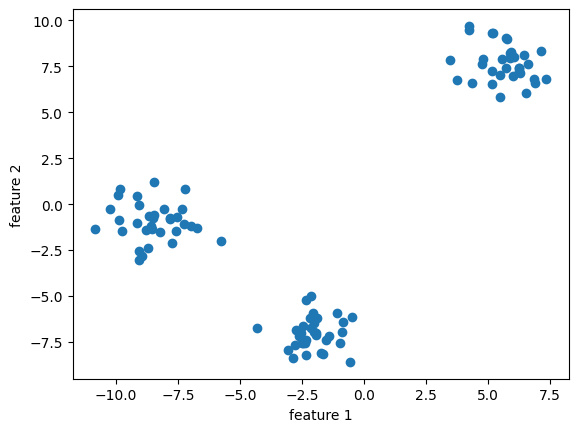

In [ ]:
X, y = make_blobs()
plt.scatter(*X.T)
plt.xlabel("feature 1")
plt.ylabel("feature 2")

Если у вас сгенерировались "слипшиеся" гауссианы, перезапустите ячейку.

### Реализация EM-алгоритма для разделения смеси гауссиан

Как и при реализации многих других алгоритмов машинного обучения, нашим основным инструментом будет модуль numpy:

In [ ]:
import numpy as np

__Задание 1. (5 баллов, выставляются только при наличии визуализации в следующей задаче)__ Реализуйте EM-алгоритм, следуя интерфейсу sklearn, см. прототип ниже. EM-алгоритм описан на слайде 48 в [презентации](https://github.com/ftad/BM2020/blob/master/materials/presentation_EM_ftad.pdf).

* Один из шагов EM-алгоритма разделения смеси включает подсчет матрицы ковариации. С этим поможет функция [np.cov](https://numpy.org/doc/stable/reference/generated/numpy.cov.html), пример использования дан ниже. Посмотрите документацию функции и обратите внимание на параметр, позволяющий задавать веса объектов!
* Один из шагов EM-алгоритма включает подсчет плотности многомерного нормального распределения. С этим поможет функция [scipy.stats.multivariate_normal](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.multivariate_normal.html).
* Чтобы избежать ошибки Singular matrix, сообщающей, что у какой-то гауссианы получилась вырожденная матрица ковариации, прибавляйте к вычисляемым матрицам ковариации единичную матрицу, умноженную на небольшой коэффициент (cov_reg в реализации).

Вов всех заданиях ниже рекомендуется использовать гиперпараметры, заданные по умолчанию, если не указано иное.

In [ ]:
# example with np.cov
np.cov(X, rowvar=False)

array([[34.88580093, 22.3142791 ],
       [22.3142791 , 38.01220366]])

In [ ]:
from scipy.stats import multivariate_normal
from sklearn.base import BaseEstimator

class GMM(BaseEstimator):
    def __init__(self, num_clusters=3, num_iters=100, cov_reg=1e-6):
        self.num_clusters = num_clusters
        self.num_iters = num_iters
        self.cov_reg = cov_reg

    def fit_transform(self, X, need_theta=True):
        """
        * input: data matrix X, shape: [num_objects, num_features]

        The method runs EM-algorithm to fit
        a mixture of multinomial Gaussians on data.
        At the end of running, the following atributes should be learned:
        * self.mu: Gaussians' means, shape: [num_clusters, num_features]
        * self.sigma: Gaussians' covariance matrices,
                      shape: [num_clusters, num_features, num_features]
        * self.pi: prior misture weights, shape: [num_clusters]
                   self.pi should sum to 1
        The code for attribute initialization is given below

        The method returns:
        * y: posterior distribution over Gaussians for each objects,
             shape: [num_objects, num_clusters]
        """
        self.n = X.shape[0]
        self.d = X.shape[1]
        self.mu = 2*np.random.rand(self.num_clusters, self.d) - 1
        self.sigma = np.concatenate([np.eye(self.d)[None, :, :] \
                     for k in range(self.num_clusters)], axis=0)
        self.pi = np.random.rand(self.num_clusters)
        self.pi /= self.pi.sum()

        ### your code below ###
        for j in range(self.num_iters):
          # E-step, update distribution of latent variable

          # get numerator of g_ik for each k
          numerator = np.array([self.pi[k] * \
                        multivariate_normal(mean = self.mu[k], cov = self.sigma[k]).pdf(X) \
                        for k in range(self.num_clusters)]).T
          #print(numerator.shape)

          # get denominator of g_ik for eack j
          denominator = np.sum(numerator, axis=1)

          # get g_ik
          z_distribution = numerator / denominator[:, None]
          ### DEBUG print(z_distribution.shape)
          # get sum of g_ik by each k for M-step
          sum_g_ik = np.sum(z_distribution, axis=0)
          #print(sum_g_ik.shape)

          # M-step, update parameters
          self.pi = [sum_g_ik[k] / self.n for k in range(self.num_clusters)]
          ### DEBUG print(self.pi)
          ### DEBUG print(np.array([1/sum_g_ik[k] for k in range(self.num_clusters)]).shape)
          ### DEBUG print(np.array([np.sum(X * (z_distribution[:, k][:, None]), axis=0) for k in range(self.num_clusters)]).shape)
          self.mu = [1/sum_g_ik[k] * \
                        np.sum(X * (z_distribution[:, k][:, None]), axis=0) \
                        for k in range(self.num_clusters)]
          ### DEBUG print(self.mu)
          self.sigma = [1/sum_g_ik[k] * \
                        np.sum((z_distribution[:, k][:, None, None]) * \
                                (X - self.mu[k])[:, :, None] * \
                                (X - self.mu[k])[:, None, :],
                                axis=0) \
                        + np.eye(self.d)*self.cov_reg
                        for k in range(self.num_clusters)]
        if need_theta:
          print('pi', self.pi)
          print('mu', self.mu)
          print('sigma', self.sigma)

        # to return posterior distribution over Gaussians for each object, we jast look at z_distribution
        return z_distribution

### Тестирование EM-алгоритма на синтетических данных

__Задание 2 (0.5 балла, включая вопрос ниже).__ Протестируйте вашу реализацию на синтетических данных, сгенерированных выше в ноутбуке: запустите алгоритм на данных X с числом гауссиан, равным 3, __визуализируйте__, к какому кластеру отнесен каждый объект (получится трехцветный scatter-plot в осях двух признаков), а также __визуализируйте__ средние обученных гауссиан (на этом же графике). Чтобы определить принадлежность объекта к кластеру, используйте максимум апостериорной вероятности. Для получения хорошего результата может понадобиться перезапустить EM-алгоритм из другой начальной инициализации.

In [ ]:
np.array(em.mu)[:, 0]

array([ 8.18105351, -3.81692816, -4.57593157])

pi [0.33000000026484577, 0.34, 0.3299999997351543]
mu [array([-8.47977766, -0.94295032]), array([5.67177209, 7.70004354]), array([-2.03625959, -7.02416592])]
sigma [array([[ 1.18186224, -0.11635296],
       [-0.11635296,  1.03432006]]), array([[ 0.85615105, -0.22006836],
       [-0.22006836,  0.93712918]]), array([[0.60096491, 0.04260037],
       [0.04260037, 0.7217229 ]])]


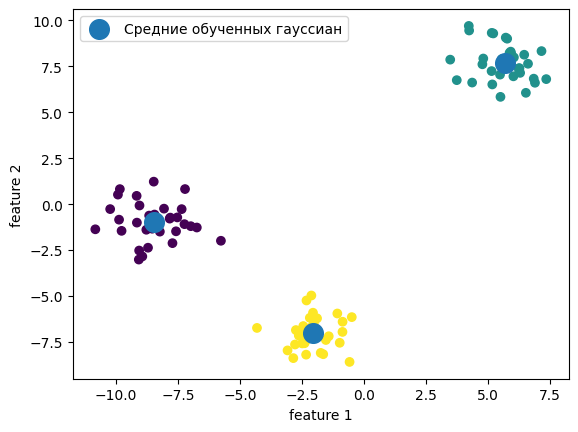

In [ ]:
### your code here
em = GMM()
result_clusters = em.fit_transform(X)
clusters = result_clusters.argmax(axis=1)


plt.scatter(X[:, 0], X[:, 1], c=clusters)
plt.scatter(np.array(em.mu)[:, 0], np.array(em.mu)[:, 1], s=200, label='Средние обученных гауссиан')
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.legend()
plt.show()

__Вопрос:__ получились ли матрицы ковариации, близкие к тем, которые использовались при генерации случайных данных?

__Ответ:__ [Посмотрим на дефолтные значения функции make_blobs](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html) и поймём, что мы можем посмотреть истинные метки классов, чтобы сравнить ковариацию для каждой из смесей

In [ ]:
print(y)
print(clusters)

[0 1 2 0 0 2 1 0 0 2 1 0 0 1 1 1 2 0 2 1 1 0 1 2 1 0 1 2 0 2 2 1 0 2 2 2 1
 0 0 2 0 2 2 0 1 0 0 1 0 1 1 2 2 2 1 1 1 1 0 2 2 0 1 1 1 2 1 0 0 0 2 1 0 1
 0 0 0 2 1 1 2 1 2 2 0 0 2 0 1 1 0 2 2 2 1 0 2 0 2 2]
[1 0 2 1 1 2 0 1 1 2 0 1 1 0 0 0 2 1 2 0 0 1 0 2 0 1 0 2 1 2 2 0 1 2 2 2 0
 1 1 2 1 2 2 1 0 1 1 0 1 0 0 2 2 2 0 0 0 0 1 2 2 1 0 0 0 2 0 1 1 1 2 0 1 0
 1 1 1 2 0 0 2 0 2 2 1 1 2 1 0 0 1 2 2 2 0 1 2 1 2 2]


Видим, что по сравнению с реальными метками для данных, в ЕМ-алгоритме перепутались по наименованию 0 и 1. Но это всего лишь Label Encoding, поэтому ничто не запрещает поменять в наборе данных y местами 0 и 1, чтобы корректно подсчитать всё

In [ ]:
y[y==0] = 3
y[y==1] = 0
y[y==3] = 1
y

array([1, 0, 2, 1, 1, 2, 0, 1, 1, 2, 0, 1, 1, 0, 0, 0, 2, 1, 2, 0, 0, 1,
       0, 2, 0, 1, 0, 2, 1, 2, 2, 0, 1, 2, 2, 2, 0, 1, 1, 2, 1, 2, 2, 1,
       0, 1, 1, 0, 1, 0, 0, 2, 2, 2, 0, 0, 0, 0, 1, 2, 2, 1, 0, 0, 0, 2,
       0, 1, 1, 1, 2, 0, 1, 0, 1, 1, 1, 2, 0, 0, 2, 0, 2, 2, 1, 1, 2, 1,
       0, 0, 1, 2, 2, 2, 0, 1, 2, 1, 2, 2])

In [ ]:
clusters[y!=clusters]

array([], dtype=int64)

Видим, что по сравнению с исходной генерацией у ЕМ-алгоритма буквально 0 ошибок, ура!

In [ ]:
### your code here (for question)
for k in range(3):
  print('real cov for cluster =', k)
  print(np.cov(X[y==k], rowvar=False))
  print('em cov for cluster =', k)
  print(em.sigma[k])
  print()

real cov for cluster = 0
[[ 1.21879439 -0.11998897]
 [-0.11998897  1.06664151]]
em cov for cluster = 0
[[ 1.18186224 -0.11635296]
 [-0.11635296  1.03432006]]

real cov for cluster = 1
[[ 0.88209399 -0.22673709]
 [-0.22673709  0.965526  ]]
em cov for cluster = 1
[[ 0.85615105 -0.22006836]
 [-0.22006836  0.93712918]]

real cov for cluster = 2
[[0.61974404 0.04393163]
 [0.04393163 0.74427571]]
em cov for cluster = 2
[[0.60096491 0.04260037]
 [0.04260037 0.7217229 ]]



EM-алгоритм выполняет "мягкую" кластеризацию: для каждого объекта определяется, с какой вероятностью он принадлежит к каждому из кластеров, вместо того, чтобы выбирать один кластер ("жесткая" кластеризация). Чтобы иллюстрировать это свойство, используем EM-алгоритм для разделения двух близко расположенных гауссиан. Сгенерируем такие данные:

Text(0, 0.5, 'feature 2')

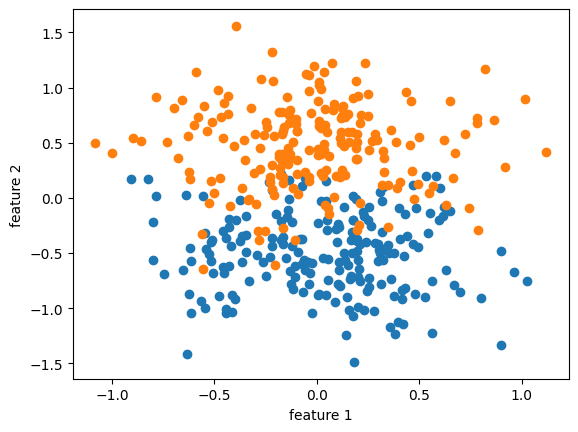

In [ ]:
X0 = np.random.multivariate_normal([0, -0.5], 0.15*np.eye(2), size=200)
X1 = np.random.multivariate_normal([0, 0.5], 0.15*np.eye(2), size=200)
X2 = np.vstack([X0, X1])
plt.scatter(*X0.T)
plt.scatter(*X1.T)
plt.xlabel("feature 1")
plt.ylabel("feature 2")

__Задание 3 (0.5 балла).__ Обучите вашу реализацию EM-алгоритма с числом гауссиан, равным 2, на сгенерированных данных. Сделайте __две__ визуализации: одна для жесткой кластеризации (цвета показывают, к какому кластеру отнесен каждый объект - аналогично предыдущей визуализации) и одна для мягкой кластеризации (цвета показывают апостериорную вероятность первой гауссианы). __Сделайте выводы из этих визуализаций.__ Для получения хорошего результата может понадобиться перезапустить EM-алгоритм из другой начальной инициализации.

pi [0.507915020134882, 0.492084979865118]
mu [array([ 0.02128255, -0.49562469]), array([-0.01482506,  0.47830824])]
sigma [array([[ 0.14755619, -0.01118843],
       [-0.01118843,  0.13276807]]), array([[ 0.1536226 , -0.00765845],
       [-0.00765845,  0.13784882]])]


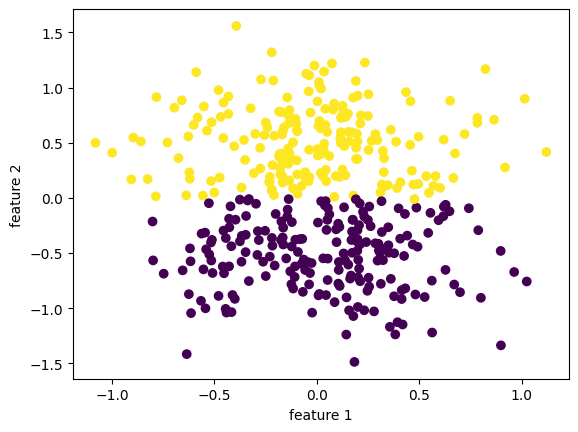

In [ ]:
### your code here
em_task3 = GMM(num_clusters=2)
result_clusters = em_task3.fit_transform(X2)
clusters = result_clusters.argmax(axis=1)


plt.scatter(X2[:, 0], X2[:, 1], c=clusters)
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.show()

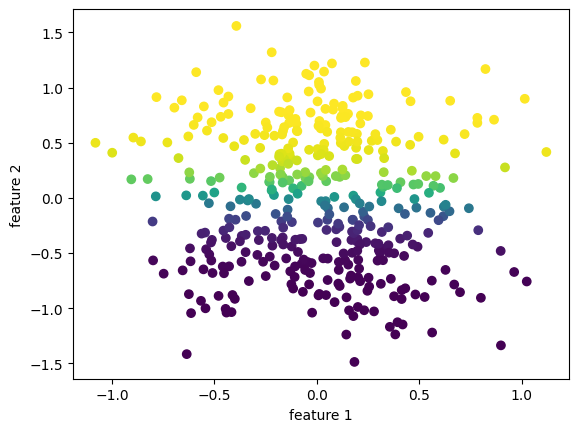

In [ ]:
plt.scatter(X2[:, 0], X2[:, 1], c=result_clusters[:, 1])
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.show()


__Ваш вывод:__ видим, что при жёсткой кластеризации ЕМ прочно проводит разделяющую гиперплоскость вдоль линии 'feature 2=0', тогда как при мягкой кластеризации точки в окрестности этой линии постепенно красятся в синий при уменьшении значения feature 2, что даёт нам возможность понять, что алгоритм сильно колеблется, к какой же гауссиане относить их

### Тестирование EM-алгоритма на данных с изображениями

Теперь протестируем реализацию на данных изображений цифр. Будем использовать стандартный набор данных digits. Нормируем данные (для численной устойчивости) и обрежем рамку толщиной один пиксель (также для численной устойчивости).

In [ ]:
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler

In [ ]:
digits = load_digits()
X_dig = digits["data"]
y_dig = digits["target"]
X_dig.shape

(1797, 64)

In [ ]:
scaler = StandardScaler()
X_dig_sc = scaler.fit_transform(X_dig)

In [ ]:
X_dig_cr = X_dig_sc.reshape(-1, 8, 8)[:, 1:-1, 1:-1].\
                    reshape(X_dig_sc.shape[0], -1)

In [ ]:
X_dig_cr.shape

(1797, 36)

__Задание 4 (каждый пункт 1 балл).__ Примените EM-алгоритм к данным, использовав число гауссиан, равное 10.
1. Изобразите средние всех десяти гауссиан в виде изображений 6x6, подписав (в plt.title) номер гауссианы. Напечатайте, к какому кластеру отнесены первые 10 объектов выборки. Напечатайте их классы согласно данным. Можно ли сказать, что какие-то кластеры соответствуют конкретным цифрам? Какие? Приветствуется другой анализ визуализации. Может потребоваться перезапустить EM-алгоритм.
2. Найдите несколько объектов (>=3), у которых максимальная апостериорная вероятность меньше 0.9. Визуализируйте эти объекты в виде изображений 6x6, определите для них две наибольшие предсказанные апостериорные вероятности. Можно ли проинтерпретировать, почему эти объекты находятся на "границе" кластеров? Как? Чтобы найти >=3 объектов, удовлетворяющих условию, может потребоваться перезапустить EM-алгоритм. В этом случае сделайте отдельную визуализацию средних гауссиан для нового запуска.

In [ ]:
# your code here
em_task4 = GMM(num_clusters=10, num_iters=100)
result_clusters = em_task4.fit_transform(X_dig_cr, need_theta=False)
clusters = result_clusters.argmax(axis=1)

print('Первые 10 объектов выборки по версии ЕМ относятся к следующим гауссианам:', clusters[:10])
print('Первые 10 объектов выборки на самом деле соответствуют следующим классам:', y_dig[:10])

Первые 10 объектов выборки по версии ЕМ относятся к следующим гауссианам: [1 6 5 0 8 0 3 7 9 8]
Первые 10 объектов выборки на самом деле соответствуют следующим классам: [0 1 2 3 4 5 6 7 8 9]


__Выводы к пункту 1:__

In [ ]:
import pandas as pd
comparison = pd.DataFrame(np.array([clusters, y_dig]).T, columns=['cluster', 'real'])
comparison['ind'] = 1
pd.pivot_table(comparison, index='real', columns='cluster', aggfunc='count')

ind                                                          
cluster      0      1     2      3      4     5     6      7     8     9
real                                                                    
0          NaN  173.0   NaN    NaN    NaN   NaN   NaN    NaN   5.0   NaN
1          3.0    NaN   2.0   28.0    NaN  86.0  42.0    6.0   NaN  15.0
2        105.0    NaN  21.0   28.0    1.0   9.0   NaN    6.0   NaN   7.0
3        144.0    NaN   6.0    3.0   18.0   5.0   1.0    NaN   NaN   6.0
4          NaN    NaN   NaN    NaN    3.0   8.0   NaN  106.0  59.0   5.0
5          5.0    NaN  35.0  107.0    NaN   NaN   1.0    NaN  27.0   7.0
6          NaN    NaN   NaN  167.0    NaN   NaN  11.0    NaN   2.0   1.0
7          NaN    NaN  13.0    NaN    4.0   1.0   NaN  151.0   9.0   1.0
8         39.0    NaN  22.0    2.0    1.0  14.0   6.0    1.0   9.0  80.0
9         12.0    NaN   4.0    NaN  103.0   NaN   7.0   18.0  21.0  15.0

Соответствие кластеров и циферок:
* Реальный 0 - кластеры 1 (не пересекается с другими реальными)
* Реальный 1 - кластеры 3, 5 и 6 (пересекается с реальными 2, 5, 6)
* Реальный 2 - кластеры 0 и 3 (пересекается с реальными 1, 3, 5, 6, 8)
* Реальный 3 - кластер 0 (пересекается с реальным 2 и 8)
* Реальный 4 - кластеры 7 и 8 (пересекается с реальными 5, 7)
* Реальный 5 - кластеры 3 и 8 (пересекается с реальными 1, 2, 4, 5, 6)
* Реальный 6 - кластер 3 (пересекается с реальным 1, 2, 5)
* Реальный 7 - кластеры 7 (пересекается с реальным 4)
* Реальный 8 - кластеры 0 и 9 (пересекается с реальными 2, 3)
* Реальный 9 - кластер 4 (не пересекается с другими реальными)

Так, видим, что алгоритм достаточно часто ошибается, причисляя разные цифры к одной и той же гауссиане. Возможно, дело в размерности, возможно - в сложностях из-за обрезания картинок (увидим на примерах ниже)

Выводы:
* 0 и 9 кажутся наиболее легко распознаваемыми цифрами, редко пересекающимися с другими цифрами
* 2 и 5 кажется наиболее запутанной цифрой, которая часто путается аж с пятью другими цифрами

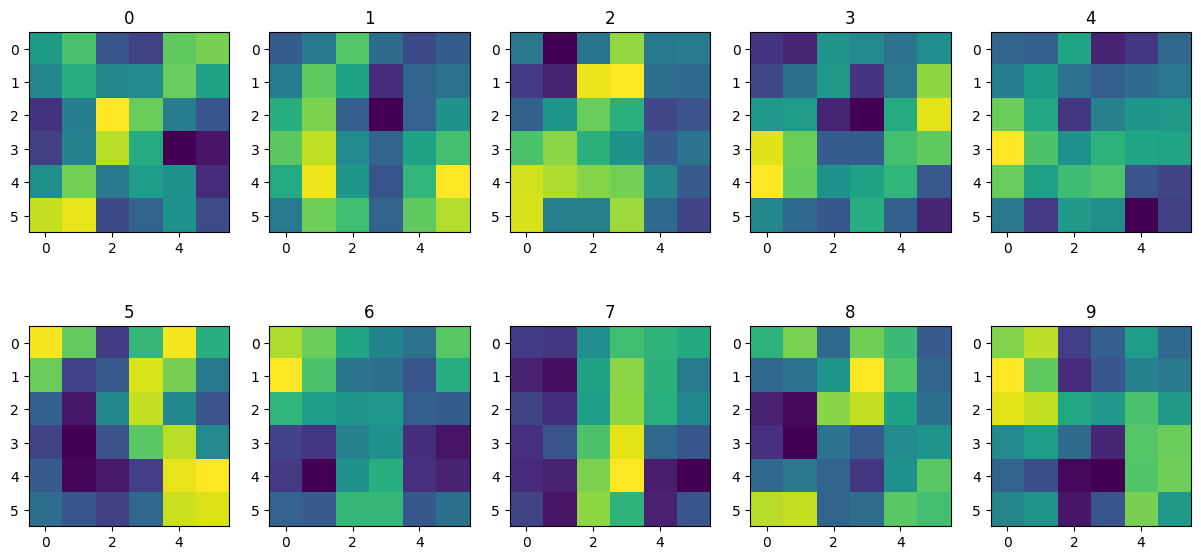

In [ ]:
mus = np.array(em_task4.mu).reshape(-1, 6, 6)

fig, axs = plt.subplots(2, 5, figsize=(15, 7))

for k in range(mus.shape[0]):
  axs[k//5, k%5].imshow(mus[k])
  axs[k//5, k%5].set_title(k)

__Выводы к пункту 2:__

(5, 36)
(6, 6)
(6, 6)
(6, 6)
(6, 6)
(6, 6)


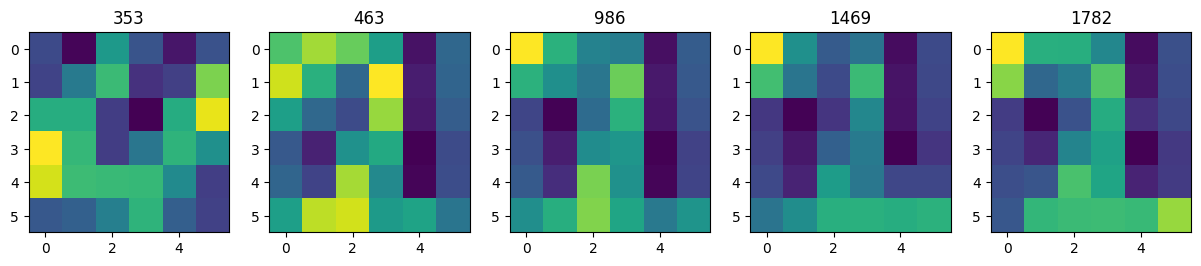

In [ ]:
aposterior_max = result_clusters.max(axis=1)
indexes = np.where(aposterior_max<0.9)
print(X_dig_cr[indexes].shape)
fig, axs = plt.subplots(1,
                        5, figsize=(15, 7))

for i in range(X_dig_cr[indexes].shape[0]):
  print(X_dig_cr[indexes][i].reshape(6, 6).shape)
  axs[i%5].imshow(X_dig_cr[indexes][i].reshape(6, 6))
  axs[i%5].set_title(indexes[0][i])

(8, 8)
(8, 8)
(8, 8)
(8, 8)
(8, 8)


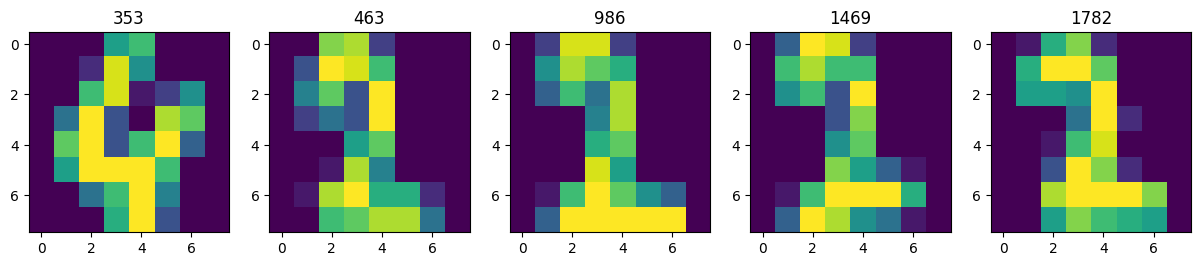

In [ ]:
fig, axs = plt.subplots(1,
                        5, figsize=(15, 7))

for i in range(X_dig[indexes].shape[0]):
  print(X_dig[indexes][i].reshape(8, 8).shape)
  axs[i%5].imshow(X_dig[indexes][i].reshape(8, 8))
  axs[i%5].set_title(indexes[0][i])

In [ ]:
top2_indexes = result_clusters[indexes].argsort(1)[:, :-3:-1]
for i in range(top2_indexes.shape[0]):
  print(indexes[0][i], ':', 'clusters =', top2_indexes[i], 'probas =', np.take(result_clusters[indexes][i], top2_indexes[i]))

353 : clusters = [8 7] probas = [0.83130575 0.16869425]
463 : clusters = [3 0] probas = [0.70130986 0.29869014]
986 : clusters = [3 0] probas = [0.81108932 0.18891068]
1469 : clusters = [0 3] probas = [0.83385685 0.16614315]
1782 : clusters = [3 0] probas = [0.73826414 0.26173586]


* Первый объект находится на границе кластеров 8 и 7, соответствующих реальным цифрам 4 и 7/4 соответственно. По визуализации полной картинки видим, что в целом цифру сложно спутать с 7, но можно спутать с 9, который также встречается в обоих кластерах
* Второй и последующий объекты находятся на границе кластеров 3 и 0, которые соответствуют реальным цифрам 5/6 и 2/3 соответственно. Тут мы явно видим, что оригинальные цифры явно не похожи на 3, 5 или 6. Скорее, они должно были варьироваться между 1 и 2, где в реальности второй, четвёртый и возможно пятый объект должны относиться к 2, а третий кажется 1.

В общем, на картинках 8х8 даже человеку непросто отличить схожим образом написанные цифры, поэтому можно заключить, что ЕМ-алгоритм неплохо справился с поставленной задачей